# Clustering de documents

## Imports

In [1]:
import collections
import os
import string
import sys

import pandas as pd
from nltk import word_tokenize
from nltk.corpus import stopwords
from pprint import pprint
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cosine

In [2]:
import nltk

nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\elaur\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [3]:
data_path = "../data/txt/"

## Choisir une décennie

In [4]:
DECADE = "1900"

## Charger tous les  fichiers de la décennie et en créer une liste de textes

In [5]:
files = [f for f in sorted(os.listdir(data_path)) if f"_{DECADE[:-1]}" in f]

In [6]:
# Exemple de fichiers
files[:5]

['KB_JB838_1900-01-02_01-00002.txt',
 'KB_JB838_1900-01-07_01-00007.txt',
 'KB_JB838_1900-01-08_01-00003.txt',
 'KB_JB838_1900-01-18_01-00008.txt',
 'KB_JB838_1900-01-19_01-00004.txt']

In [7]:
texts = [open(data_path + f, encoding="utf-8").read() for f in files]

In [8]:
# Exemple de textes
texts[0][:400]

'La bretelle, sur les origines de laquelle le;- •pinions sont contradictoires, n’en remonte pa,> moins à une honorable antiquité. De tous temps, bien que sous des formes diverses, elle a servi à maintenir la culotte et, plus tard, le pantalon. Sous Louis-Philippe, elle eut même son heure de gloire. On la vit aux culottes-à-pont de la garde nationale, et le roi lui-méme, dans telles estampes recherc'

## Vectoriser les documents à l'aide de TF-IDF

In [9]:
# Création d'une fonction de pré-traitement
def preprocessing(text, stem=True):
    """ Tokenize text and remove punctuation """
    text = text.translate(string.punctuation)
    tokens = word_tokenize(text)
    return tokens

### Instancier le modèle TF-IDF avec ses arguments

In [10]:
vectorizer = TfidfVectorizer(
    tokenizer=preprocessing,
    stop_words=stopwords.words('french'),
    max_df=0.5,
    min_df=0.1,
    lowercase=True)

### Construire la matrice de vecteurs à l'aide de la fonction `fit_transform`

In [11]:
tfidf_vectors = vectorizer.fit_transform(texts)

In [12]:
# Détail de la matrice
tfidf_vectors.shape

(1000, 3942)

### Imprimer le vecteur tf-IDF du premier document

In [13]:
pd.Series(
    tfidf_vectors[0].toarray()[0],
    index=vectorizer.get_feature_names_out()
    ).sort_values(ascending=False)

janvier       0.289411
président     0.217008
dépêche       0.182851
anglaises     0.152892
guerre        0.143251
                ...   
découvert     0.000000
découverte    0.000000
découvrir     0.000000
décès         0.000000
♦             0.000000
Length: 3942, dtype: float64

## Comprendre les vecteurs et leurs "distances"

In [14]:
cosine([1, 2, 3], [1, 2, 3])

0

In [15]:
cosine([1, 2, 3], [1, 2, 2])

0.02004211298777725

In [16]:
cosine([1, 2, 3], [2, 2, 2])

0.07417990022744858

### Tests sur nos documents

In [17]:
tfidf_array = tfidf_vectors.toarray()

In [18]:
# Vecteur du document 0
tfidf_array[0]

array([0., 0., 0., ..., 0., 0., 0.])

In [19]:
# Vecteur du document 1
tfidf_array[1]

array([0., 0., 0., ..., 0., 0., 0.])

In [20]:
cosine(tfidf_array[0], tfidf_array[1])

0.8598526598061422

## Appliquer un algorithme de clustering sur les vecteurs TF-IDF des documents

Pour en savoir plus sur le KMeans clustering :
- https://medium.com/dataseries/k-means-clustering-explained-visually-in-5-minutes-b900cc69d175

### Définir un nombre de clusters

In [21]:
N_CLUSTERS = 5

### Instancier le modèle K-Means et ses arguments

In [22]:
km_model = KMeans(n_clusters=N_CLUSTERS)

### Appliquer le clustering à l'aide de la fonction `fit_predict`

In [23]:
#distance intra et extra cluster, des centres tres eloignes l'un de l'autre et des points tres regroupe autour du centre
clusters = km_model.fit_predict(tfidf_vectors)

In [24]:
clustering = collections.defaultdict(list)

for idx, label in enumerate(clusters):
    clustering[label].append(files[idx])

In [25]:
pprint(dict(clustering))

{0: ['KB_JB838_1900-01-02_01-00002.txt',
     'KB_JB838_1900-01-08_01-00003.txt',
     'KB_JB838_1900-01-28_01-00002.txt',
     'KB_JB838_1900-01-29_01-00003.txt',
     'KB_JB838_1900-02-09_01-00001.txt',
     'KB_JB838_1900-02-12_01-00001.txt',
     'KB_JB838_1900-02-13_01-00002.txt',
     'KB_JB838_1900-02-18_01-00002.txt',
     'KB_JB838_1900-02-22_01-00006.txt',
     'KB_JB838_1900-02-24_01-00005.txt',
     'KB_JB838_1900-02-25_01-00002.txt',
     'KB_JB838_1900-03-11_01-00006.txt',
     'KB_JB838_1900-03-21_01-00002.txt',
     'KB_JB838_1900-03-27_01-00001.txt',
     'KB_JB838_1900-03-28_01-00001.txt',
     'KB_JB838_1900-03-31_01-00002.txt',
     'KB_JB838_1900-04-23_01-00001.txt',
     'KB_JB838_1900-04-26_01-00005.txt',
     'KB_JB838_1900-04-30_01-00001.txt',
     'KB_JB838_1900-05-21_01-00001.txt',
     'KB_JB838_1900-06-06_01-00001.txt',
     'KB_JB838_1900-06-13_01-00001.txt',
     'KB_JB838_1900-06-14_01-00001.txt',
     'KB_JB838_1900-06-16_01-00004.txt',
     'KB_JB838_1

## Visualiser les clusters

### Réduire les vecteurs à 2 dimensions à l'aide de l'algorithme PCA
Cette étape est nécessaire afin de visualiser les documents dans un espace 2D

https://fr.wikipedia.org/wiki/Analyse_en_composantes_principales

In [26]:
pca = PCA(n_components=2)
reduced_vectors = pca.fit_transform(tfidf_vectors.toarray())

In [27]:
# Reduction des vecteurs a 10 dimension
reduced_vectors[:10]

array([[-0.29863371, -0.18098934],
       [-0.16672903,  0.51822786],
       [-0.08271536,  0.10386053],
       [ 0.20097485,  0.26703696],
       [ 0.64203844, -0.24300442],
       [ 0.09443748,  0.21750646],
       [ 0.63832941, -0.26708497],
       [-0.31550701, -0.17332104],
       [ 0.03022567,  0.18802818],
       [-0.24407136,  0.10471283]])

### Générer le plot

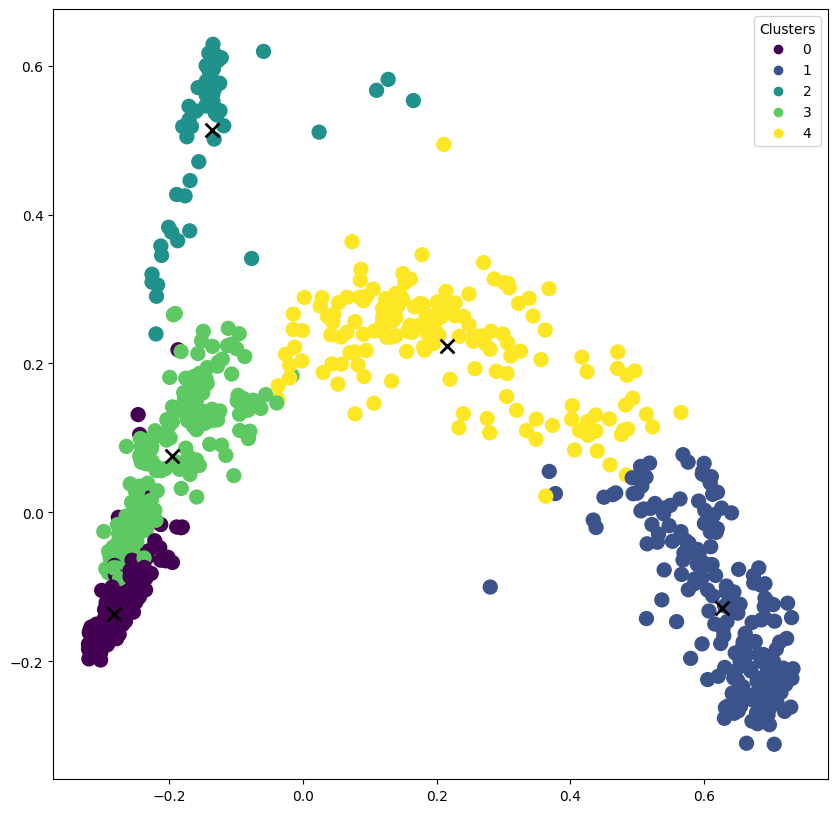

In [28]:
x_axis = reduced_vectors[:, 0]
y_axis = reduced_vectors[:, 1]

plt.figure(figsize=(10,10))
scatter = plt.scatter(x_axis, y_axis, s=100, c=clusters)

# Ajouter les centroïdes
centroids = pca.transform(km_model.cluster_centers_)
plt.scatter(centroids[:, 0], centroids[:, 1],  marker = "x", s=100, linewidths = 2, color='black')

# Ajouter la légende
plt.legend(handles=scatter.legend_elements()[0], labels=set(clusters), title="Clusters")